In [2]:
import numpy as np
from qiskit.quantum_info import Statevector
from IPython.display import display, Markdown
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
import random

# Deutsch Algorithm

In [3]:
# def oracle(f, circuit):
#     oracle = Operator(np.array([
#         [1 - f(0), f(0), 0, 0],
#         [f(0), 1 - f(0), 0, 0],
#         [0, 0, 1 - f(1), f(1)],
#         [0, 0, f(1), 1 - f(1)]]))
#     circuit.unitary(oracle, [0, 1], label="oracle")
def oracle(f, circuit):
    if f(0) == f(1):
        # Constant function
        if f(0) == 1:
            circuit.x(1)  # Apply X gate to qubit 1
        # If f(0) == 0, do nothing (identity)
    else:
        # Balanced function
        circuit.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target

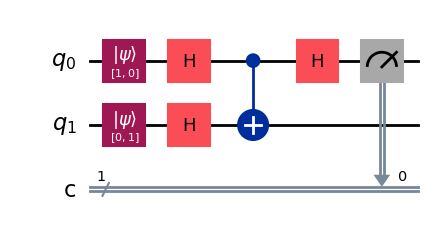

In [4]:
zero_qubit = Statevector.from_label('0')
one_qubit = Statevector.from_label('1')


circuit = QuantumCircuit(2, 1)

circuit.initialize(zero_qubit, 0)
circuit.h(0)
circuit.initialize(one_qubit, 1)
circuit.h(1)
oracle(lambda x:x, circuit)
circuit.h(0)
circuit.measure(0, 0)


circuit.draw('mpl')
# state = Statevector.from_instruction(circuit)
# print("Statevector after operations:\n", state)

In [5]:
calculator = BasicSimulator()
transpiledScheme = transpile(circuit, calculator)
freq = calculator.run(transpiledScheme).result().get_counts()

display(freq)

{'1': 1024}

# Deutsch-Jozsa Algorithm

In [21]:
def balanced_oracle(circuit, input_size):
    """
    Implements a balanced oracle on the circuit.
    Half of the input states map to 0, and the other half map to 1.
    """
    # Choose random input qubits to control the output qubit
    control_qubits = random.sample(range(input_size), k=random.randint(1, input_size))
    for q in control_qubits:
        circuit.cx(q, input_size)  # Add controlled-NOT gates from input to output qubit

def constant_oracle(circuit, input_size, output=0):
    """
    Implements a constant oracle on the circuit.
    output=0 means f(x) = 0 for all x, output=1 means f(x) = 1 for all x.
    """
    if output == 1:
        circuit.x(input_size)  # Flip the output qubit to make f(x) = 1

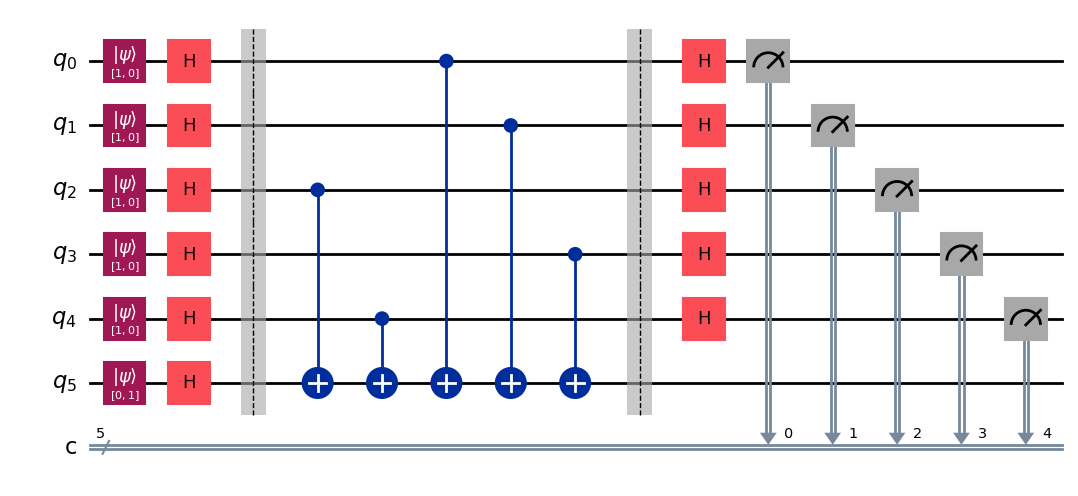

In [42]:
input_size = 5

zero_qubit = Statevector.from_label('0')
one_qubit = Statevector.from_label('1')
circuit = QuantumCircuit(input_size + 1, input_size)
for i in range(input_size):
    circuit.initialize(zero_qubit, i)
    circuit.h(i)
circuit.initialize(one_qubit, input_size)
circuit.h(input_size)
circuit.barrier()
balanced_oracle(circuit, input_size)
circuit.barrier()
for i in range(input_size):
    circuit.h(i)
    circuit.measure(i, i)

circuit.draw('mpl')

In [44]:
calculator = BasicSimulator()
transpiledScheme = transpile(circuit, calculator)
freq = calculator.run(transpiledScheme).result().get_counts()

display(freq)

{'11111': 1024}